[1.0, 1.0088623910292918, 1.0149206379719018, 1.0149206379719018]
[1.0, 1.0317244921940476, 1.0108674436871965, 1.0277908540044147]
[1.0, 1.0007471020354968, 1.0003116443423112, 1.0012469741240542, 1.0013020903429373, 0.9993949516544481, 0.9983252353777597, 0.9991776846578776, 0.9994935237748428, 0.9987757132935753, 0.9986700380379977, 0.9996391806870448, 0.9994449886566547, 0.999324251485459, 0.9982527404232797, 0.9987758483466239, 0.9978295637843823, 0.9995341543198558, 0.9989320725714309, 0.9990424293001846, 0.9993434081021385, 0.9994198958729005, 0.9983992314490951, 0.9987877034191331]
[1.0, 1.000358733702865, 1.000460695383347, 0.9998569631061289, 0.9995478832678645, 0.999723833126429, 0.9998987912410072, 0.9999738498080475, 0.9993642309097562, 0.9992416621787106, 0.9991990551182235, 0.9989578490712243, 0.9989210120959928, 0.9991155039043726, 0.9990525635763976, 0.9985112139922673, 0.9986572150612353, 0.9988255837018314, 0.9980309887647929, 0.9976528510552853, 0.9979187277104455, 

/tmp/ipykernel_2084011/3452679196.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
/tmp/ipykernel_2084011/3452679196.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)


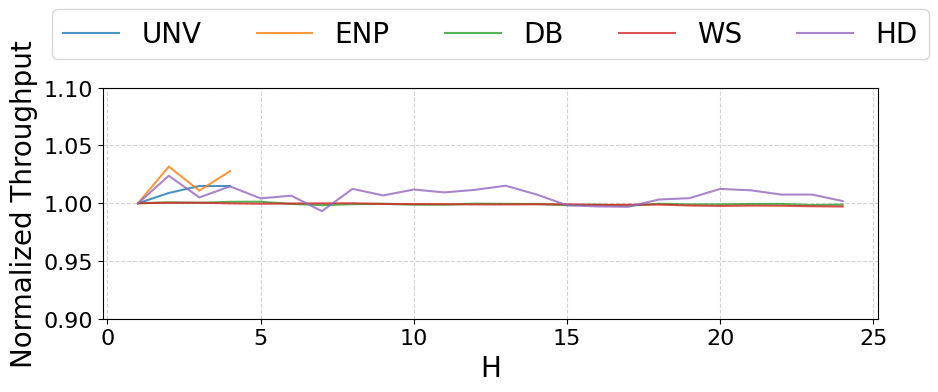

In [10]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


namearr = ["UNV","ENP","DB","WS","HD"]

fig,ax = plt.subplots(figsize=(10,3))


trafficnamearr = ["unv1","prv1","cluster_a","cluster_b","cluster_c"]
numintervalarr = [8,8,48,48,48]

for itrafficname,trafficname in enumerate(trafficnamearr):
    numinterval = numintervalarr[itrafficname]
    resultfile = f"/home/annzhou/DRing/src/emp/datacentre/computerouting2/resultfiles/result_dring_0_0_{trafficname}_2_0"
    throughputlistdict = dict()
    with open(resultfile,'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split(',')
            H = int(tokens[0])
            throughput = float(tokens[2])
            if H not in throughputlistdict: throughputlistdict[H] = list()
            throughputlistdict[H].append(throughput)

    throughputdict = dict()
    for H,throughputlist in throughputlistdict.items():
        throughputdict[H] = sum(throughputlist)/len(throughputlist)


    xlist = list()
    ylist = list()
    for H in range(1,numinterval//2+1):
        xlist.append(H)
        ylist.append(throughputdict[H]/throughputdict[1])
    print(ylist)
    plt.plot(xlist,ylist,label=namearr[itrafficname],alpha=0.8)
# plt.title(trafficname)
plt.legend()
plt.xlabel("H",fontsize=20)
plt.ylabel("Normalized Throughput",fontsize=20)
plt.ylim(0.9,1.1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
plt.grid(color='lightgrey', linestyle='dashed', axis="both")
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.4), fontsize=20)
plt.savefig(f"/home/annzhou/DRing/src/emp/datacentre/nsdi25_plotting/fig_h.pdf", dpi=600, bbox_inches='tight')
plt.show()